In [1]:
from matplotlib import cm
from matplotlib.pyplot import *
import numpy as np

## 3-dimensional Gradient Descent

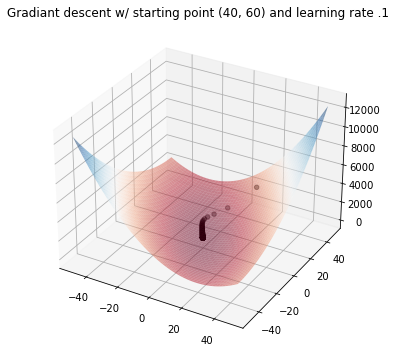

Min:  [-1.00000611  1.50000989]


In [2]:
def f(x,y):
    return x - y + 2*(x**2) + (2*x*y) + (y**2)

def dfdy(x,y):
    return 2*x + 2*y - 1

def dfdx(x,y):
    return 4*x + 2*y + 1

def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

def grad_descent_mult(df,x_prev,learn_rate):
    epsilon = 0.000001
    grad_itter = 1
    seq_x = []
    seq_y = []
    x_next = np.subtract(x_prev, learn_rate*df(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    # Itterate until abs(x_{t+1} - x_{t}) < epsilon
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        # Update x_{t}
        x_prev = x_next

        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*[df/dx df/dy]
        x_next = x_prev - learn_rate*df(x_prev[0],x_prev[1])
        grad_itter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    return (x_next, grad_itter, seq_x,seq_y)

grad_output = grad_descent_mult(grad_vector, np.array([40,60]), .1)

# Get z values of output to plot scatterplot
seq_z_map = map(lambda x, y: f(x, y), list(grad_output[2]), list(grad_output[3]))
seq_z = list(seq_z_map)

# (X,Y) grid on [-50,50]
x = np.arange(-50, 50, 0.25)
y = np.arange(-50, 50, 0.25)
X, Y = np.meshgrid(x, y)

Z = f(X,Y)

# Plot f(X,Y) and Newton's method output in 3D
fig = figure(1,figsize=(6,6))
ay = fig.add_subplot(projection='3d')
scatter = ay.scatter(grad_output[2],grad_output[3], seq_z,c="Black",zorder=1)
surf = ay.plot_surface(X, Y, Z, zorder=2, alpha=.5,cmap=cm.RdBu)
title("Gradiant descent w/ starting point (40, 60) and learning rate .1")
show()
print("Min: ",grad_output[0])

## 2-dimensional Gradient Descent

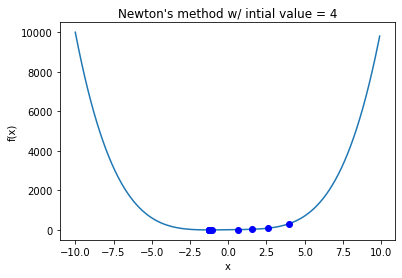

Min:  -1.2347728250532986


In [3]:
def f(x):
    return x**4 + x**2 + 10*x

def df(x):
    return 4*(x**3) + 2*x + 10

def d2f(x):
    return 12*(x**2) + 2

def plotf(x, xdots, label):

    # Compute y-values
    y = f(x)

    # Plot (x, f(x))
    plot(x,y)
    xlabel("x")
    ylabel("f(x)")
    title(label)
    
    # Plot points on f(x)
    plot(xdots, f(xdots), 'bo')
    show()
    
def grad_descent_newton(df,d2f,x_prev,sequence):

    epsilon = 0.0001
    grad_itter = 1
    x_next = x_prev - df(x_prev)/d2f(x_prev)
    sequence = np.append(sequence, x_next)

    # while abs(x_{t+1} - x_{t}) > threshold, keep iterating gradient descent
    while abs(x_next - x_prev) > epsilon:
        # Update x_{t}
        x_prev = x_next
        # Gradient descent step
        # Set new x_{t+1} = x_{t} - f'(x_{t}/f''(x_{t})
        x_next = x_prev - df(x_prev)/d2f(x_prev)
        # Save itteration 
        sequence = np.append(sequence, x_next)
        # Increment itteration
        grad_itter += 1
        
    return (x_next, sequence, grad_itter)

newton_output = grad_descent_newton(df,d2f,4, np.array([4]))

x = np.arange(-10, 10, 0.1)

plotf(x, newton_output[1], "Newton's method w/ intial value = 4")
print('Min: ',newton_output[0])